# 1. Исследовательский анализ данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import faiss
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

In [2]:
base = pd.read_csv('C:/Users/79276/Downloads/data/base.csv', index_col=0)
train = pd.read_csv('C:/Users/79276/Downloads/data/train.csv', index_col=0)
validation = pd.read_csv('C:/Users/79276/Downloads/data/validation.csv', index_col=0)
validation_answer = pd.read_csv('C:/Users/79276/Downloads/data/validation_answer.csv', index_col=0)

In [3]:
data_list = [base, train, validation, validation_answer]

def data_info(dataset):
    display(dataset.head())
    display(dataset.info())
    try: 
        dataset.hist(figsize=(10, 10))
    except: 
        print('')

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,181.449700,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,195.234190,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,164.381470,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,136.233580,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,112.119064,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


<class 'pandas.core.frame.DataFrame'>
Index: 2918139 entries, 0-base to 4744766-base
Data columns (total 72 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64


None

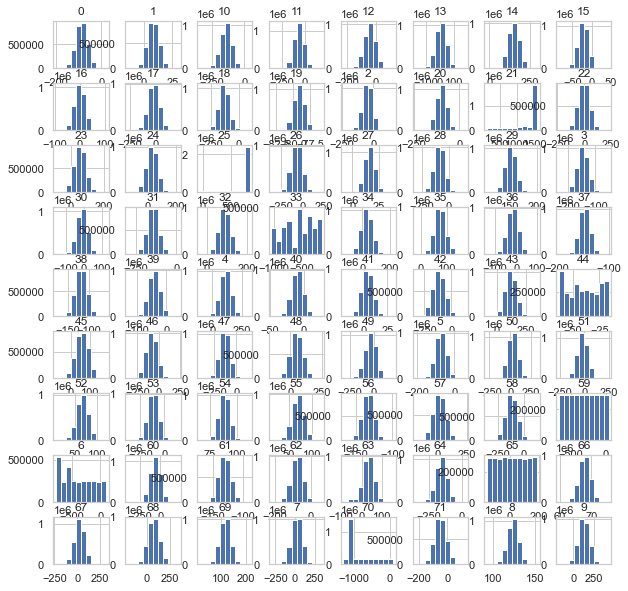

In [4]:
sns.set(style="whitegrid")
data_info(data_list[0])

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,Target
Id,,,,,,,,,,,,,,,,,,,,,
0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,30.413513,...,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,140.331070,...,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,211.607820,...,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,242.650650,...,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,103.392670,...,45.028910,-196.09207,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0-query to 99999-query
Data columns (total 73 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21  

None

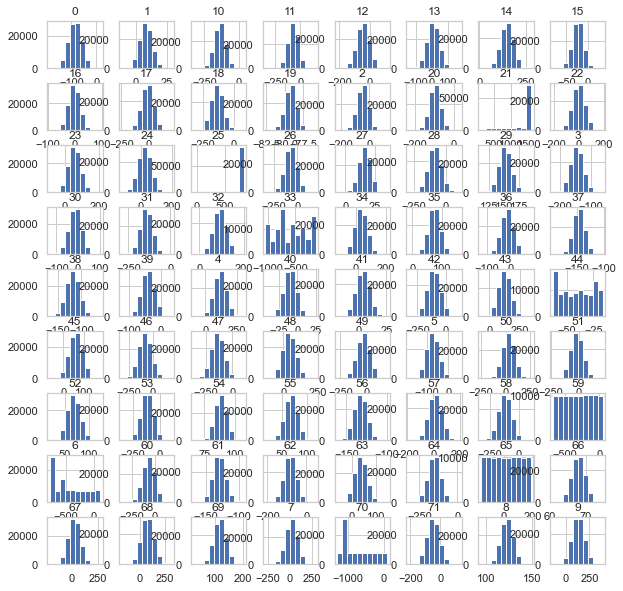

In [5]:
sns.set(style="whitegrid")
data_info(data_list[1])

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Id,,,,,,,,,,,,,,,,,,,,,
100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,75.215750,...,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,53.128998,...,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,168.920320,...,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,75.206730,...,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,102.086914,...,-123.77025,45.635944,-134.25893,13.735359,70.61763,15.332115,154.56812,101.700640,-1171.892332,-125.307890


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 72 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21

None

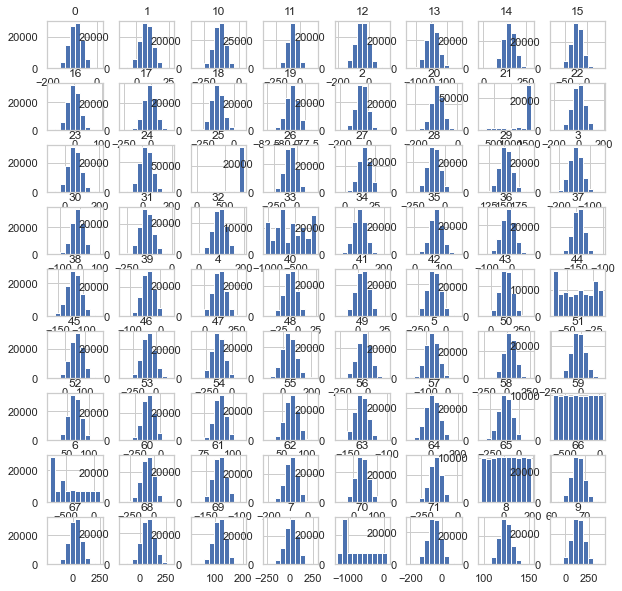

In [6]:
sns.set(style="whitegrid")
data_info(data_list[2])

In [7]:
sns.set(style="whitegrid")
data_info(data_list[3])

,Expected
Id,
100000-query,2676668-base
100001-query,91606-base
100002-query,472256-base
100003-query,3168654-base
100004-query,75484-base


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 100000-query to 199999-query
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Expected  100000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


None

ПО результатам исследование выявлено следующее:
- В основном данные распределены нормально
- Пропусков нет (датасет подготовлен)
- Базовый датасет имеет почти 300 тысяч строк и 72 столбца признаков
- Обучачающий датасет содержит 100 тысяч строк и 73 столбца признаков (в том числе и целевой)
- Валидационный датасет содержит так же 100 тысяч строк и 72 столбца признаков
- Ответы являются по сути 73-м столбцом к валидационному датасету

# 2. Подготовка и обучение модели

Сначала разделим датасет на признаки и целевой признак

In [8]:
targets = train["Target"]
train.drop("Target", axis=1, inplace=True)

In [9]:
def normalize_with_indices(df):
       
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    df_normalized = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    return df_normalized

In [10]:
base_scaled = normalize_with_indices(base)
train_scaled  = normalize_with_indices(train)

Проведем поиск ближайший соседей при помощи Faiss 

In [11]:
dims = base_scaled.shape[1]
n_cells = 1000

quantizer = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

idx_l2.nprobe = 100

In [12]:
idx_l2.train(np.ascontiguousarray(base_scaled).astype('float32'))

idx_l2.add(np.ascontiguousarray(base_scaled).astype('float32'))

In [13]:
base_index = {k: v for k, v in enumerate(base_scaled.index.to_list())}

In [14]:
%%time
# Поиск ближайших соседей на тренировочных данных
k_neighbours = 30
vecs, idx = idx_l2.search(np.ascontiguousarray(train_scaled.values).astype('float32'), k_neighbours)

Wall time: 5min 34s


In [15]:
accuracy = 0
for target, el in zip(targets.values.tolist(), idx.tolist()):
    accuracy += int(target in [base_index[r] for r in el])

print(100 * accuracy / len(idx))

73.858


Подготовим данные для CatBoost

In [16]:
idx = np.array([[base_index[_] for _ in el] for el in idx], dtype=object) 

vecs = vecs.reshape(-1, 1)

In [17]:
cat_target = np.array([[1 if x == target else 0 for x in el] for el, target in zip(idx, targets.values.tolist())]).flatten()

In [18]:
candidate_features = base_scaled.loc[idx.flatten()].values 
object_features = train_scaled.values  

In [19]:
del base
del train
del base_scaled 
del train_scaled

In [20]:
repeated_object = np.repeat(object_features, k_neighbours, axis=0)

In [21]:
cat_features = np.hstack((vecs, candidate_features, repeated_object))

In [22]:
del idx 
del vecs 
del candidate_features 

Подготовка и обучение CatBoostClassifier на тренировочном датасете

In [23]:
params = {
    'n_estimators': 100, 
    'depth': 5,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'verbose': 10
}

In [24]:
cat_model = CatBoostClassifier(**params)

In [25]:
%%time
# Обучаем модель на тренировочных данных 
cat_model.fit(cat_features, cat_target)

CatBoostError: bad allocation

In [26]:
cat_model.save_model("cat_model.cbm")

CatBoostError: There is no trained model to use save_model(). Use fit() to train model. Then use this method.

Выполнено обучение модели поиска ближайших соседей. 

# 3. Проверка на валидационной выборке

In [ ]:
Подготовка данных для работы Faiss

In [ ]:
validation_answer = validation_answer.squeeze()

In [ ]:
def normalize_with_indices(df):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_normalized = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
    return df_normalized

base_scaled = normalize_with_indices(base)
validation_scaled = normalize_with_indices(validation)

In [ ]:
del base
del validation

In [ ]:
Проведем поиск ближайший соседей при помощи Faiss на валидационной выборке

In [ ]:
dims = base_scaled.shape[1]
n_cells = 1000

quantizer = faiss.IndexFlatL2(dims)
idx_l2 = faiss.IndexIVFFlat(quantizer, dims, n_cells)

idx_l2.nprobe = 100

In [ ]:
idx_l2.train(np.ascontiguousarray(base_scaled).astype('float32'))

idx_l2.add(np.ascontiguousarray(base_scaled).astype('float32'))

In [ ]:
base_index = {k: v for k, v in enumerate(base_scaled.index.to_list())}

In [ ]:
%%time
# Поиск ближайших соседей на валидационных данных
k_neighbours = 30
vecs, idx = idx_l2.search(np.ascontiguousarray(validation_scaled.values).astype('float32'), k_neighbours)

In [ ]:
accuracy = 0
for target, el in zip(validation_answer.values.tolist(), idx.tolist()):
    acc += int(target in [base_index[r] for r in el])

print(100 * accuracy / len(idx))

Подготовим данные для CatBoost

In [ ]:
idx = np.array([[base_index[_] for _ in el] for el in idx], dtype=object) 

vecs = vecs.reshape(-1, 1)

In [ ]:
cat_target = np.array([[1 if x == target else 0 for x in el] for el, target in zip(idx, validation_answer.values.tolist())]).flatten()

In [ ]:
candidate_features = base_scaled.loc[idx.flatten()].values 
object_features = validation_scaled.values  

In [ ]:
del base_scaled 
del validation_scaled

In [ ]:
repeated_object = np.repeat(object_features, k_neighbours, axis=0)

In [ ]:
cat_features = np.hstack((vecs, candidate_features, repeated_object))

In [ ]:
del vecs 
del candidate_features 

In [ ]:
Рекомендации при использовании CatBoost

In [ ]:
cat_model = CatBoostClassifier()
cat_model.load_model("cat_model.cbm")

In [ ]:
neighbor_probs = cat_model.predict_proba(cat_features)

In [ ]:
cat_val_probs = []
idx_val = []

In [ ]:
cat_val_probs.append(np.vstack(neighbor_probs))
idx_val.append(np.vstack(idx))

In [ ]:
cat_val_probs = np.array(cat_val_probs)

idx_val = np.array(idx_val)

In [ ]:
Найдем индексы элементов с максимальной вероятностью предсказания

In [ ]:
%%time

k = 30
n = 5

max_indices = np.empty((0, n), dtype=int)
for i in range(0, len(cat_val_probs.flatten()), k):
    sub_arr = cat_val_probs.flatten()[i:i+k]
    max_values = np.argpartition(sub_arr, -n)[-n:]
    max_indices = np.vstack((max_indices, max_values))

In [ ]:
neighbors_idx = idx_val[np.arange(len(idx_val))[:, None], max_indices]

In [ ]:
accuracy = 0
for target_val, pred_vals in zip(validation_answer.values.tolist(), neighbors_idx):
    if target_val in pred_vals[:n]:
        accuracy += 1

accuracy_at_n = 100 * accuracy / len(neighbors_idx)

print(accuracy_at_n)